In [11]:
#1. 한글폰트 설치
!apt install fonts-nanum -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,308 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글폰트 설정 

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

In [2]:
# 필요 라이러리 설치하기
# 이미지 웹 크롤링 오픈소스 
!git clone https://github.com/Heimerrr/bing_image_downloader.git

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


In [3]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader

In [4]:
#학습데이터 디렉토리 확인 및 제작 (Google Drive)
from google.colab import drive

#마운트 진행 
drive.mount('/content/gdrive')

data_dir= 'datas'
colab_defalut_dir = '/content/gdrive/My Drive/Colab Notebooks/transfer Learning/person'
origin_dir = os.getcwd()

try:
  os.chdir(colab_defalut_dir)
  if not os.path.exists(data_dir):
    os.mkdir(data_dir)
  
  os.chdir(data_dir)
  print('current dir = ', os.getcwd())

except Exception as err:
  os.chdir(origin_dir)
  print(str(err))




Mounted at /content/gdrive
current dir =  /content/gdrive/My Drive/Colab Notebooks/transfer Learning/person/datas


In [5]:
directory_list = [
                  './train',
                './test']


for directory in directory_list:
  if not os.path.isdir(directory):
    os.makedirs(directory)
    print('directory 생성 ..')



In [6]:

# 수집 이미지 데이터를 학습, 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
  for directory in directory_list:
    print(directory)
    if not os.path.isdir(directory + '/' + query):
      os.makedirs(directory+ '/' + query)
      print(directory+'/'+query + '생성 완료')
    else:
      print(directory +'/'+ query + '/////////말도안돼')
 
  #데이터셋 
  cnt = 0

  for file_name in os.listdir(query):
    if cnt < train_cnt:
      print(f'[Train Dataset] {file_name}')
      shutil.move(query + '/' + file_name, './train/' + query + '/' + file_name)
    else:
      print(f'[Test Dataset] {file_name}')
      shutil.move(query + '/' + file_name, './test/' + query + '/' + file_name)
      
    cnt += 1
  
  shutil.rmtree(query)


In [ ]:
#---------------------------------------------크롤링시작------------------------------------------#

In [ ]:
query = '마동석'
downloader.download(query, limit=40, output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 20)


In [ ]:
query = '아이유'
downloader.download(query, limit=40, output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 20)

In [ ]:
query = '유재석'
downloader.download(query, limit=40, output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 20)
#---------------------------------------------크롤링완료------------------------------------------#


# 학습을 위해 pytouch 사용 - (추후 tensorflow로 바꿔보기)


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else"cpu") #device 객체

# 데이터 셋 불러오기.


In [8]:
transforms_train = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.RandomHorizontalFlip(), #데이터 증진
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225]) # 정규화(nomalization)

])

transforms_test = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])                                  
])


print(os.getcwd())

print(os.listdir(os.getcwd()))
train_datasets = datasets.ImageFolder('./train',transforms_train)
print(train_datasets)
test_datasets = datasets.ImageFolder('./test',transforms_test)
print(test_datasets)
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4,shuffle=True,num_workers=4)

print('학습데이터셋 크기:', len(train_datasets))
print('테스트데이터셋 크기:', len(test_datasets))
class_name = train_datasets.classes
print('클래스:', class_name)

/content/gdrive/My Drive/Colab Notebooks/transfer Learning/person/datas
['.ipynb_checkpoints', 'test', 'train']
Dataset ImageFolder
    Number of datapoints: 61
    Root location: ./train
    StandardTransform
Transform: Compose(
               Resize(size=(244, 244), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 63
    Root location: ./test
    StandardTransform
Transform: Compose(
               Resize(size=(244, 244), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
학습데이터셋 크기: 61
테스트데이터셋 크기: 63
클래스: ['마동석', '아이유', '유재석']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# 이미지 시각화 해보기 
def imshow(input,title):
  input = input.numpy().transpose((1,2,0))
  mean = np.array([0.485,0.456,0.406])
  std = np.array([0.229,0.224,0.225])
  input = std * input + mean
  input = np.clip(input, 0 , 1)
  #이미지 출력
  plt.imshow(input)
  plt.title(title)
  plt.show()

#학습데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태 이미지 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
for x in classes:
  print(class_name[x])

imshow(out,title=[class_name[x] for x in classes])


# 학습할 CNN 딥러닝 모델 객체 초기화


In [11]:
model = models.resnet34(pretrained=True)

num_features = model.fc.in_features
#전이 학습 (transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 학습
model.fc = nn.Linear(num_features,3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [14]:
#학습진행
num_epochs = 50
model.train()
start_time = time.time()

for epoch in range(num_epochs):
  running_loss =0.
  running_corrects = 0

  #배치 단위로 학습 데이터 불러오기
  for inputs, labels in train_dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    #모델에 입력(forward)하고 결과 계산
    optimizer.zero_grad()
    outputs = model(inputs)
    _, preds = torch.max(outputs,1)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds ==labels.data)

  epoch_loss = running_loss / len(train_datasets)
  epoch_acc = running_corrects / len(train_datasets) * 100.
  print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time()-start_time))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#0 Loss: 1.1651 Acc: 39.3443% Time: 2.3390s
#1 Loss: 0.8942 Acc: 57.3770% Time: 4.1575s
#2 Loss: 0.5061 Acc: 72.1311% Time: 5.9586s
#3 Loss: 0.3310 Acc: 88.5246% Time: 7.7829s
#4 Loss: 0.1644 Acc: 93.4426% Time: 9.5956s
#5 Loss: 0.3278 Acc: 83.6066% Time: 11.4894s
#6 Loss: 0.1570 Acc: 96.7213% Time: 13.3197s
#7 Loss: 0.2280 Acc: 91.8033% Time: 15.1855s
#8 Loss: 0.3823 Acc: 88.5246% Time: 17.0372s
#9 Loss: 0.2382 Acc: 88.5246% Time: 18.7943s
#10 Loss: 0.5108 Acc: 81.9672% Time: 20.5908s
#11 Loss: 0.1818 Acc: 90.1639% Time: 22.4372s
#12 Loss: 0.1206 Acc: 96.7213% Time: 24.2081s
#13 Loss: 0.2876 Acc: 83.6066% Time: 26.0205s
#14 Loss: 0.2881 Acc: 90.1639% Time: 27.8151s
#15 Loss: 0.1880 Acc: 91.8033% Time: 29.5979s
#16 Loss: 0.4173 Acc: 86.8852% Time: 31.4042s
#17 Loss: 0.2520 Acc: 91.8033% Time: 33.1743s
#18 Loss: 0.0687 Acc: 98.3606% Time: 34.9943s
#19 Loss: 0.1564 Acc: 93.4426% Time: 36.8672s
#20 Loss: 0.1201 Acc: 98.3606% Time: 38.7397s
#21 Loss: 0.1697 Acc: 91.8033% Time: 40.5325s
#22

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


예측결과: 아이유 (실제 정답: 아이유


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4363 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 

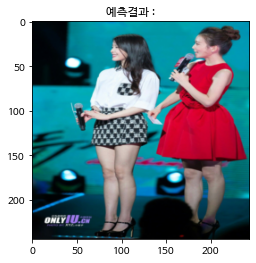

예측결과: 아이유 (실제 정답: 아이유


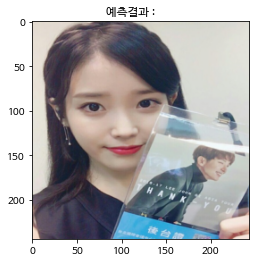

예측결과: 아이유 (실제 정답: 아이유


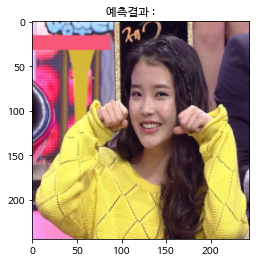

예측결과: 유재석 (실제 정답: 마동석


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4364 missing from current font.
  font.set_text(s

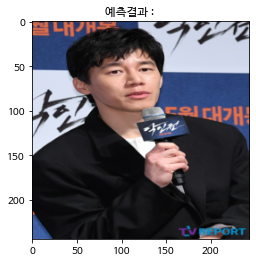

예측결과: 유재석 (실제 정답: 유재석


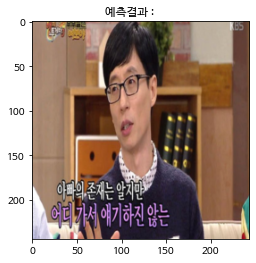

예측결과: 마동석 (실제 정답: 마동석


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4358 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 4355 missing from current font.
  font.set_text(s, 

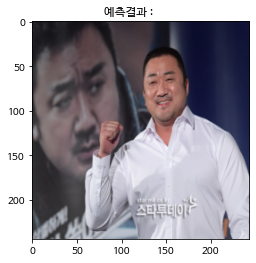

예측결과: 마동석 (실제 정답: 마동석


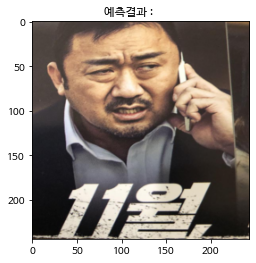

예측결과: 마동석 (실제 정답: 마동석


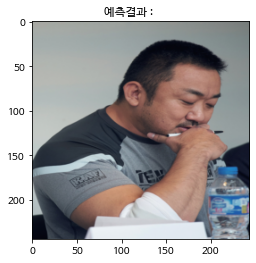

예측결과: 아이유 (실제 정답: 아이유


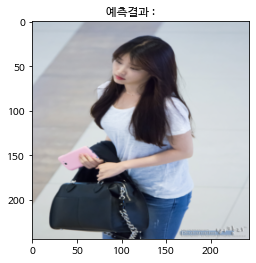

예측결과: 마동석 (실제 정답: 마동석


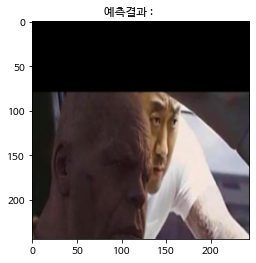

예측결과: 아이유 (실제 정답: 아이유


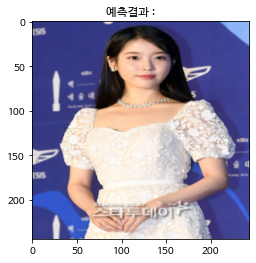

예측결과: 마동석 (실제 정답: 마동석


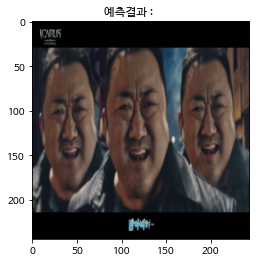

예측결과: 마동석 (실제 정답: 마동석


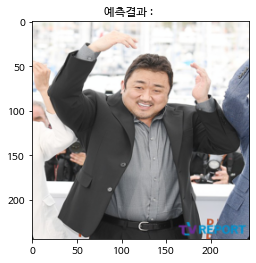

예측결과: 아이유 (실제 정답: 아이유


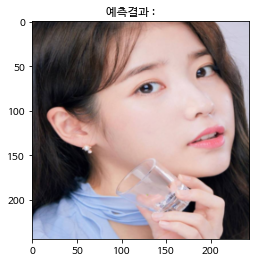

예측결과: 아이유 (실제 정답: 마동석


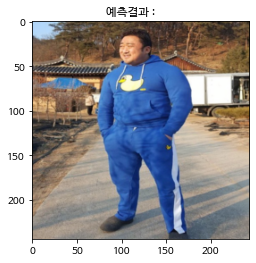

예측결과: 마동석 (실제 정답: 마동석


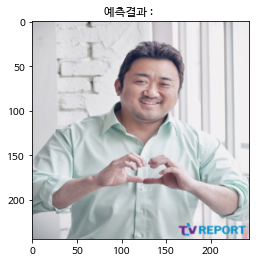

[Test Phase]Loss: 0.6666, Acc:80.9524% Time: 12.5807s


In [17]:
# 실제 테스트 데이터에 대해서 확인

model.eval()
start_time = time.time()

with torch.no_grad():
  running_loss =0.
  running_corrects = 0

  for inputs, labels in test_dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds ==labels.data)

    # 한 배치의 첫번째 이미지에 대하여결과 시각화
    print(f'예측결과: {class_name[preds[0]]} (실제 정답: {class_name[labels.data[0]]}')
    imshow(inputs.cpu().data[0], title="예측결과 : "+class_name[preds[0]])
  
  epoch_loss = running_loss / len(test_datasets)
  epoch_acc = running_corrects / len(test_datasets) * 100.
  print('[Test Phase]Loss: {:.4f}, Acc:{:.4f}% Time: {:.4f}s'.format(epoch_loss,epoch_acc,time.time()-start_time))

In [18]:
# 테스트용 이미지 다운로드하기
!wget https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg -O test_image.jpg

--2022-06-23 03:29:14--  https://upload.wikimedia.org/wikipedia/commons/f/f1/Don_Lee_by_Gage_Skidmore.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4070584 (3.9M) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]   3.88M  --.-KB/s    in 0.1s    

2022-06-23 03:29:14 (28.0 MB/s) - ‘test_image.jpg’ saved [4070584/4070584]



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4361 missing from current font.
  font.set_text(s

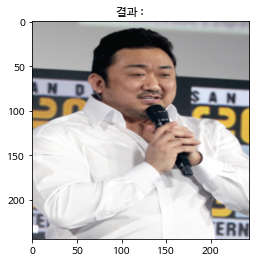

In [19]:
from PIL import Image

image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
  outputs = model(image)
  _, preds = torch.max(outputs, 1)
  imshow(image.cpu().data[0], title='결과 :' + class_name[preds[0]])